# Project Overview

## This project analyzes employee attrition data to uncover insights about:

 - Attrition trends and patterns

 - Demographic factors influencing attrition

 - Job role and department performance

 - Salary and satisfaction levels

 - Work-life balance and career development

## Dataset

 - Source: IBM HR Analytics Employee Attrition Dataset

 - Sample: 1,470 employee records

 - Columns: EmployeeNumber, Age, Attrition, BusinessTravel, Department, DistanceFromHome, Education, Gender, JobRole, MaritalStatus, MonthlyIncome, OverTime, and others

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option("future.no_silent_downcasting", True)

In [2]:
hr_data = pd.read_csv("hr_attrition_dataset.csv")

In [3]:
hr_data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
hr_data.shape

(1470, 35)

In [5]:
hr_data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
hr_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
hr_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Dataset Overview
 - Shape: (1470, 35) → 1470 employees × 35 features

# Variables:

 - Numerical (26): Age, DailyRate, DistanceFromHome, Education, HourlyRate, MonthlyIncome, TotalWorkingYears, YearsAtCompany, etc.

 - Categorical (9): Attrition, BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, Over18, OverTime

## Data Cleaning

In [9]:
total_missing_values = hr_data.isnull().sum().sum()
print(f"The number of total missing values are: {total_missing_values}")

The number of total missing values are: 0


In [10]:
#Cleaning categorical values (Yes/No to 1/0).

In [11]:
hr_data["Attrition"] = hr_data["Attrition"].replace({"Yes": 1, "No": 0})

In [12]:
hr_data["OverTime"] = hr_data["OverTime"].replace({"Yes": 1, "No": 0})

In [13]:
hr_data.duplicated().sum()

0

## Exploratory Data Analysis (EDA): General Overview

In [14]:

employees_by_department = hr_data.groupby("Department")["EmployeeNumber"].count()
print(employees_by_department)

Department
Human Resources            63
Research & Development    961
Sales                     446
Name: EmployeeNumber, dtype: int64


In [15]:
average_age_and_salary = hr_data[["Age", "MonthlyIncome"]].mean().round()
print(average_age_and_salary)

Age                37.0
MonthlyIncome    6503.0
dtype: float64


In [16]:
#Gender Distribution
gender_distribution = hr_data["Gender"].value_counts()
print(gender_distribution)

Gender
Male      882
Female    588
Name: count, dtype: int64


In [17]:
gender_by_department = hr_data.groupby("Department")["Gender"].value_counts()
print(gender_by_department)

Department              Gender
Human Resources         Male       43
                        Female     20
Research & Development  Male      582
                        Female    379
Sales                   Male      257
                        Female    189
Name: count, dtype: int64


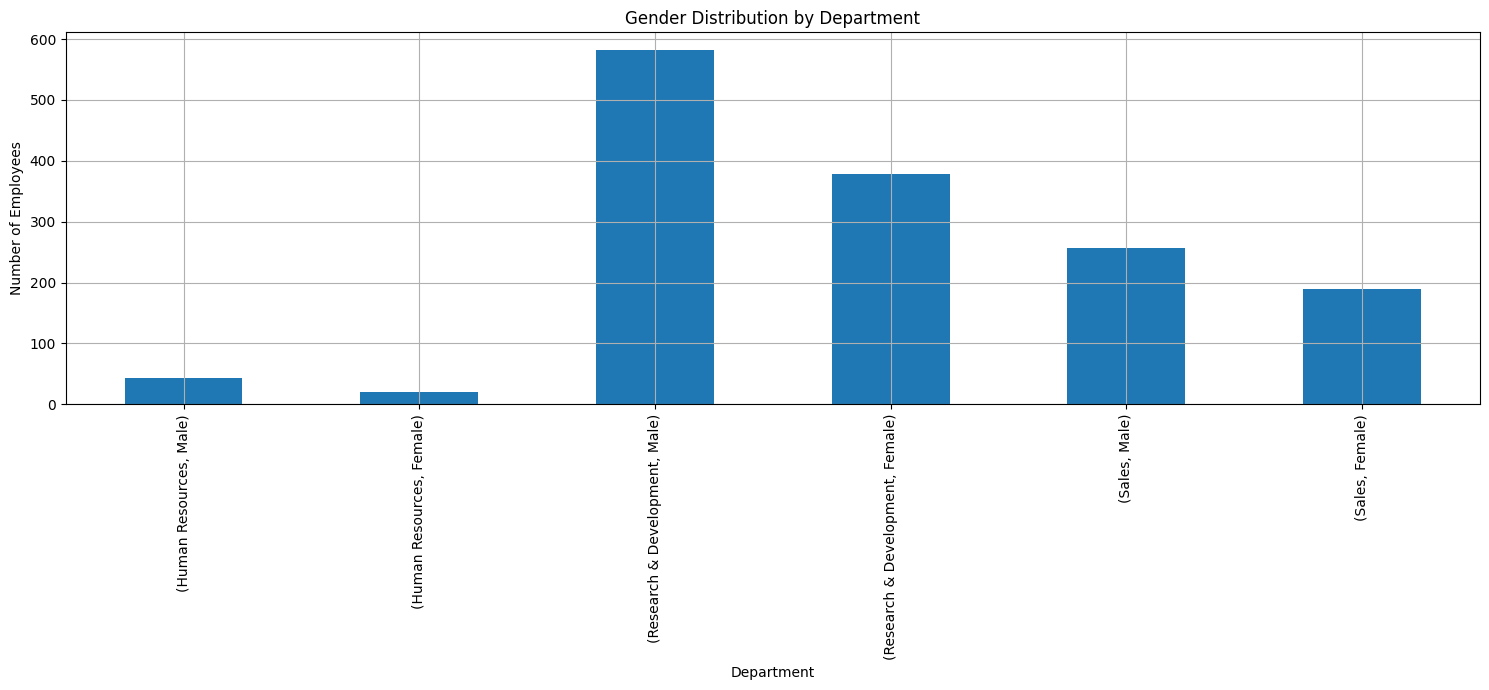

In [18]:
gender_by_department.plot(
    kind="bar", 
    figsize=(15,7), 
    title="Gender Distribution by Department"
)
plt.ylabel("Number of Employees")
plt.xlabel("Department")
plt.grid(True)
plt.tight_layout()
plt.show()

## Attrition Analysis (Main Part)

In [19]:
# Calculate attrition
attrition_caunts = hr_data["Attrition"].value_counts()
print(attrition_caunts)

Attrition
0    1233
1     237
Name: count, dtype: int64


In [20]:
#Global attrition percentage
attrition_percentage = (hr_data["Attrition"].sum() / len(hr_data)) * 100
print(attrition_percentage)

16.122448979591837


In [33]:
#Breakdown by department
dept_breakdown = (hr_data.groupby("Department")["Attrition"].mean() * 100).astype(int).round()
print(dept_breakdown)

Department
Human Resources           19
Research & Development    13
Sales                     20
Name: Attrition, dtype: int32


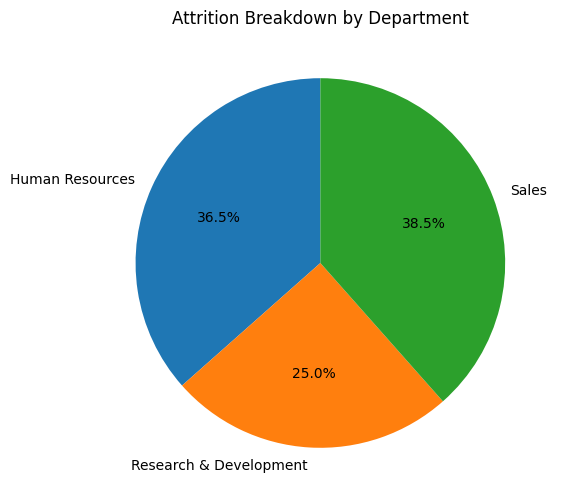

In [34]:
plt.figure(figsize=(6,6))
plt.pie(
    dept_breakdown,
    labels=dept_breakdown.index,
    autopct="%1.1f%%",  
    startangle=90       
)
plt.title("Attrition Breakdown by Department")
plt.show()

In [22]:
#breakdown by age 
bins = [18,25,30,40, 50,hr_data["Age"].max()+1]
labels =["18-25", "25-30", "30-40","40-50", ">50"]
hr_data["AgeGroup"] = pd.cut(hr_data["Age"], bins = bins, labels = labels, right = False)
age_breakdown = hr_data.groupby("AgeGroup", observed = True)["Attrition"].mean() * 100
print(age_breakdown)

AgeGroup
18-25    39.175258
25-30    23.144105
30-40    14.308682
40-50      9.74212
>50      13.294798
Name: Attrition, dtype: object


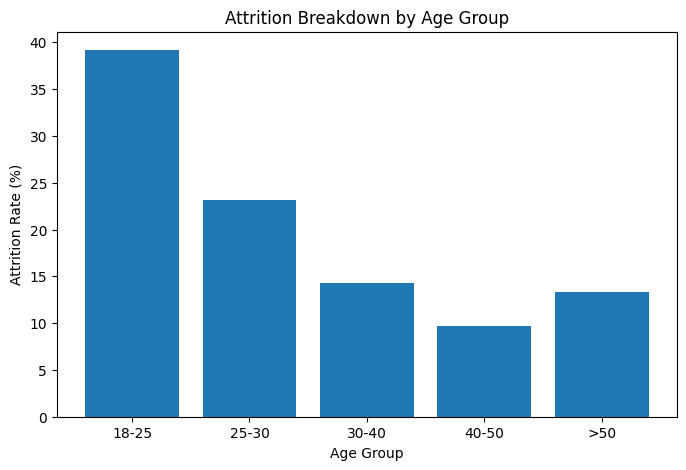

In [40]:
plt.figure(figsize=(8,5))
plt.bar(age_breakdown.index, age_breakdown)
plt.title("Attrition Breakdown by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Attrition Rate (%)")
plt.show()

In [23]:
#breakdown by salary level
bins = [0, 5000, 10000, 15000, 20000]
labels = ["0-5k", "5k-10k", "10k-15k", "15k-20k"]
hr_data["SalaryLevel"] = pd.cut(hr_data["MonthlyIncome"], bins=bins, labels=labels, right=False)
hr_data["SalaryLevel"].value_counts()


SalaryLevel
0-5k       749
5k-10k     440
10k-15k    148
15k-20k    133
Name: count, dtype: int64

In [24]:
#group by age and salary level
attrition_by_age_salary = (hr_data.groupby(["AgeGroup", "SalaryLevel"], observed=True)["Attrition"].mean() * 100).round(1)
print(attrition_by_age_salary)

AgeGroup  SalaryLevel
18-25     0-5k           39.175258
25-30     0-5k           25.142857
          5k-10k         17.647059
          10k-15k              0.0
          15k-20k              0.0
30-40     0-5k           18.589744
          5k-10k          9.486166
          10k-15k        14.583333
          15k-20k              0.0
40-50     0-5k           11.290323
          5k-10k         11.428571
          10k-15k             12.0
          15k-20k         2.857143
>50       0-5k            21.95122
          5k-10k         12.903226
          10k-15k        14.583333
          15k-20k         5.660377
Name: Attrition, dtype: object


# Key Findings: Attrition Analysis

## Overall Attrition
- Total employees: **1470**
- Employees who left: **237**
- Employees who stayed: **1233**
- **Global Attrition Rate:** **16.1%**

## Attrition by Department
- **Human Resources:** 19.0%
- **Research & Development:** 13.8%
- **Sales:** 20.6%  
Highest attrition in **Sales**, lowest in **R&D**.

## Attrition by Age Group
- **18–25:** 39.2% (highest risk group)
- **25–30:** 23.1%
- **30–40:** 14.3%
- **40–50:** 9.7%
- **>50:** 13.3%  
Younger employees (especially **18–25**) show the highest attrition.

## Attrition by Salary Level
- **0–5k:** 749 employees (largest group)
- **5k–10k:** 440 employees
- **10k–15k:** 148 employees
- **15k–20k:** 133 employees  
 Majority of employees fall into **0–5k** salary range.

## Attrition by Age and Salary Level (combined)
- **Young & low salary (18–25, 0–5k):** ~39% attrition (very high risk).
- **25–30, 0–5k:** ~25% attrition, decreases with higher salaries.
- **30–40:** Attrition lower (9–18%), slightly higher in mid-salaries.
- **40–50:** Lowest attrition overall (2.8–12%).
- **>50:** Moderate attrition (5–22%), higher in lower salary groups.

## Insights
1. **Young employees (<30)**, especially those with **lower salaries**, are most likely to leave.  
2. **Sales department** has the highest attrition compared to other departments.  
3. Attrition **decreases with age** and is generally lower among employees over 40.  
4. Salary growth beyond **10k+** is associated with **much lower attrition**.


## Correlation

In [25]:
# Select only the columns you want in the correlation
corr_matrix = hr_data[["MonthlyIncome", "YearsAtCompany", "JobSatisfaction"]].corr()
print(corr_matrix)


                 MonthlyIncome  YearsAtCompany  JobSatisfaction
MonthlyIncome         1.000000        0.514285        -0.007157
YearsAtCompany        0.514285        1.000000        -0.003803
JobSatisfaction      -0.007157       -0.003803         1.000000


## Key Findings from Correlation Analysis

- **Monthly Income ↔ Years at Company**:  
  Moderate positive correlation (**0.51**) – employees who stay longer tend to earn higher salaries.  

- **Monthly Income ↔ Job Satisfaction**:  
  Very weak negative correlation (**-0.01**) – salary has almost no relationship with job satisfaction.  

- **Years at Company ↔ Job Satisfaction**:  
  Very weak negative correlation (**-0.004**) – tenure does not meaningfully affect job satisfaction.  


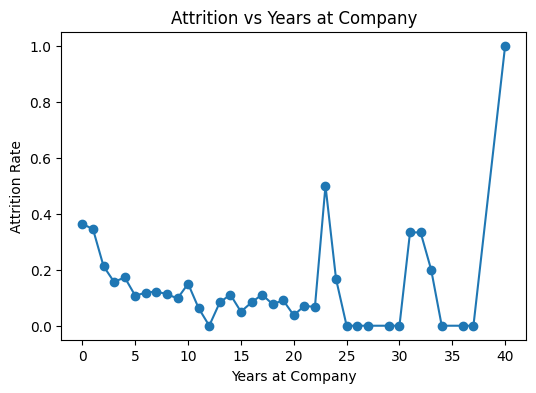

In [26]:
# Attrition vs YearsAtCompany (line chart)
plt.figure(figsize=(6,4))
attrition_years = hr_data.groupby("YearsAtCompany")["Attrition"].value_counts(normalize=True).unstack().fillna(0)
attrition_years[1].plot(kind="line", marker="o")
plt.title("Attrition vs Years at Company")
plt.xlabel("Years at Company")
plt.ylabel("Attrition Rate")
plt.show()

In [46]:
#Average Salary By Job Role
avg_salary_by_jobrole = hr_data.groupby("JobRole", observed=True)["MonthlyIncome"].mean().astype(int).round()
print(avg_salary_by_jobrole)

JobRole
Healthcare Representative     7528
Human Resources               4235
Laboratory Technician         3237
Manager                      17181
Manufacturing Director        7295
Research Director            16033
Research Scientist            3239
Sales Executive               6924
Sales Representative          2626
Name: MonthlyIncome, dtype: int32


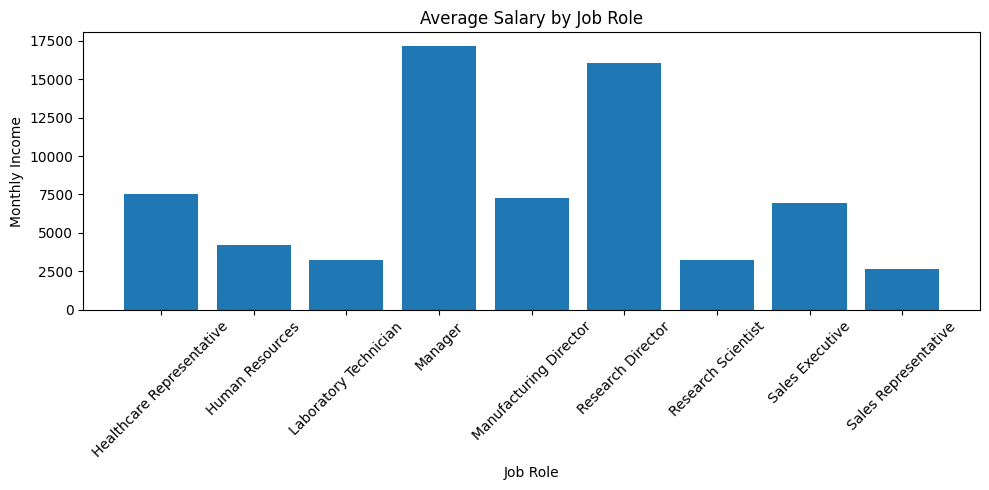

In [49]:

plt.figure(figsize=(10,5))
plt.bar(avg_salary_by_jobrole.index, avg_salary_by_jobrole)
plt.title("Average Salary by Job Role")
plt.xlabel("Job Role")
plt.ylabel("Monthly Income")
plt.xticks(rotation=45) 
plt.tight_layout()       
plt.show()